In [1]:
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
import numpy as np
from sklearn.ensemble import RandomForestClassifier


In [2]:
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
X, y = load_digits(return_X_y=True)
print(X.shape)
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


In [3]:
print(X)
image = X[0]
print(image)

[[0.00 0.00 5.00 ... 0.00 0.00 0.00]
 [0.00 0.00 0.00 ... 10.00 0.00 0.00]
 [0.00 0.00 0.00 ... 16.00 9.00 0.00]
 ...
 [0.00 0.00 1.00 ... 6.00 0.00 0.00]
 [0.00 0.00 2.00 ... 12.00 0.00 0.00]
 [0.00 0.00 10.00 ... 12.00 1.00 0.00]]
[0.00 0.00 5.00 13.00 9.00 1.00 0.00 0.00 0.00 0.00 13.00 15.00 10.00
 15.00 5.00 0.00 0.00 3.00 15.00 2.00 0.00 11.00 8.00 0.00 0.00 4.00 12.00
 0.00 0.00 8.00 8.00 0.00 0.00 5.00 8.00 0.00 0.00 9.00 8.00 0.00 0.00
 4.00 11.00 0.00 1.00 12.00 7.00 0.00 0.00 2.00 14.00 5.00 10.00 12.00
 0.00 0.00 0.00 0.00 6.00 13.00 10.00 0.00 0.00 0.00]


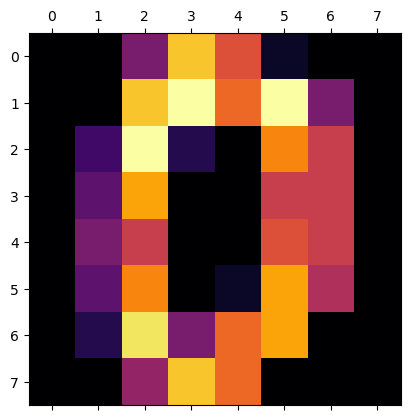

In [4]:
image = image.reshape((8,8))
plt.matshow(image, cmap= "inferno")

In [5]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
print(S)
S[0:image.shape[0], 0:image.shape[0]] = np.diag(s)
print(S)
n_component = 2
S = S[0:, 0:n_component]
print(S)
print("V: ", V)
VT = V[0:n_component, 0:]
print("VT: ", VT)

[[0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
[[48.31 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 24.96 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 8.02 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 6.03 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 3.53 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.62 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]
 [0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00]]
[[48.31 0.00]
 [0.00 24.96]
 [0.00 0.00]
 [0.00 0.00]
 [0.00 0.00]
 [0.00 0.00]
 [0.00 0.00]
 [0.00 0.00]]
V:  [[0.00 0.12 0.64 0.35 0.30 0.55 0.26 0.00]
 [0.00 0.20 0.18 -0.68 -0.51 0.29 0.34 0.00]
 [0.00 0.14 -0.06 0.47 -0.35 -0.40 0.69 0.00]
 [-0.00 0.29 0.60 -0.25 0.21 -0.66 -0.11 -0.00]
 [-0.00 0.71 -0

In [6]:
A = U.dot(S.dot(VT))
print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


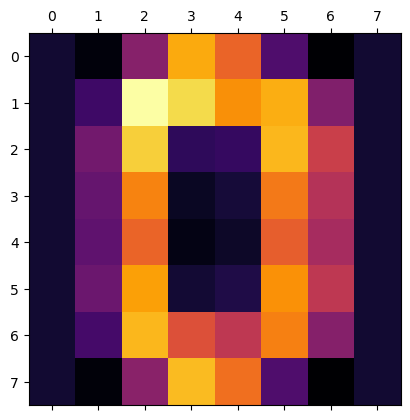

In [7]:
plt.matshow(A, cmap = 'inferno')

In [8]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

In [9]:
rf_original = RandomForestClassifier(oob_score=True)
rf_original.fit(X, y) 

RandomForestClassifier(oob_score=True)

In [10]:
rf_original.oob_score_

0.9744017807456873

In [11]:
#Train the model with 2 components (2/64, 0.03125 the Data)
svd = TruncatedSVD(n_components=2)
X_reduced = svd.fit_transform(X)

In [12]:
X_reduced[0]

array([45.86, -1.19])

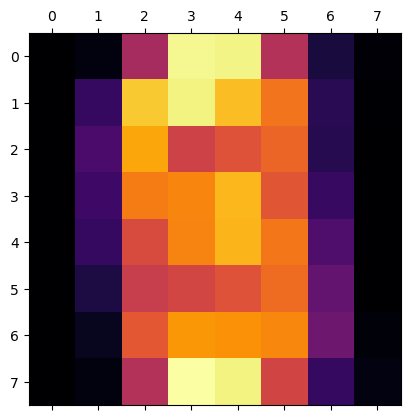

In [13]:
image_reduced = svd.inverse_transform(X_reduced[0].reshape(1,-1))
image_reduced = image_reduced.reshape((8,8))
plt.matshow(image_reduced, cmap = 'inferno')

In [14]:
rf_reduced = RandomForestClassifier(oob_score=True) 
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.39232053422370616

In [15]:
svd.explained_variance_ratio_.sum()

0.17760900851187558

In [16]:
#This time with 16 comps (16/64, 0.25 the Data)
#Beyond this point is going to result in minimal improvments
svd = TruncatedSVD(n_components=16)
X_reduced = svd.fit_transform(X)
svd.explained_variance_ratio_.sum()

0.847958712403523

In [17]:
rf_reduced = RandomForestClassifier(oob_score=True)
rf_reduced.fit(X_reduced, y)
rf_reduced.oob_score_

0.9632721202003339